Train Data Overview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


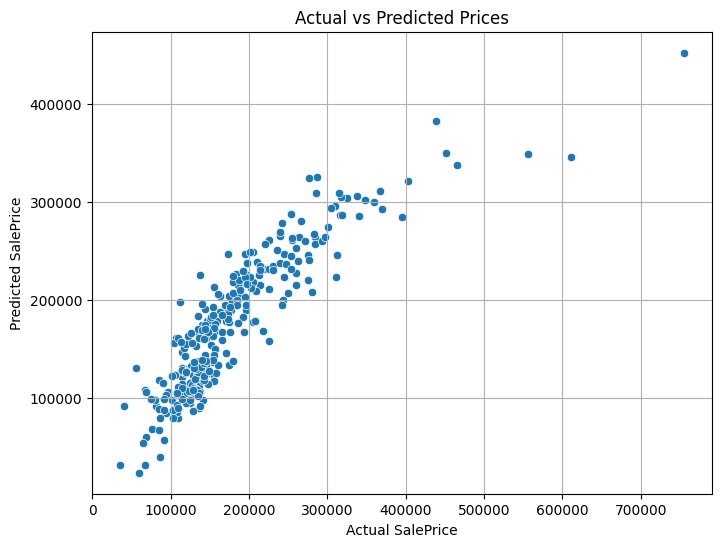

In [2]:
# Task 1: Predict House Prices using Linear Regression (Kaggle Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Upload the dataset
train_df = pd.read_csv(r'/content/drive/MyDrive/ml tasks prodigy/task 1/train.csv')
test_df = pd.read_csv(r'/content/drive/MyDrive/ml tasks prodigy/task 1/test.csv')

# Display first few rows
print("Train Data Overview:")
print(train_df.head())

# ========== Preprocessing ==========

# Select numerical features relevant to square footage and bathroom/bedroom count
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotRmsAbvGrd', 'OverallQual', 'GarageCars', 'YearBuilt']
target = 'SalePrice'

# Drop rows with missing values in selected features
data = train_df[features + [target]].dropna()

# Split features and target
X = data[features]
y = data[target]

# Train-test split for local validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ========== Model Training ==========

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# ========== Evaluation ==========

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"\nValidation RMSE: {rmse:.2f}")

# ========== Predict on Test Set ==========

# Prepare test data
test_data = test_df[features].copy()
test_data = test_data.fillna(test_data.median())  # handle missing values

# Scale using the same scaler
X_test_scaled = scaler.transform(test_data)

# Predict
test_preds = model.predict(X_test_scaled)

# ========== Create Submission File ==========

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds
})
submission.to_csv('/content/drive/MyDrive/submission.csv', index=False)
print("\n✅ Submission file created: submission.csv")

# Optional: Visualize predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
